In [6]:
import pandas as pd
import numpy as np
import pickle
from sklearn.dummy import DummyRegressor
from sklearn import linear_model, ensemble
%matplotlib notebook

In [7]:
with open('df_bus_weather.pickle', 'rb') as fp:
    df = pickle.load(fp)
df

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,Verspätung,Verspätung_total_seconds,Stunden,Temperatur (°C),Windstärke (km/h),Wetter
0,2016-10-10,Montag,4,1061896,1299,01 Roxel Hallenbad A,2016-10-10 05:16:00,2016-10-10 05:15:45,519544255.0,75273611.0,-1 days +23:59:45,-15.0,2016-10-10 05:00:00,6.0,7.0,wolkig
1,2016-10-10,Montag,2,1081890,5556,30 Ludgeriplatz B,2016-10-10 05:17:00,2016-10-10 05:17:58,519558997.0,76278508.0,00:00:58,58.0,2016-10-10 05:00:00,6.0,7.0,wolkig
2,2016-10-10,Montag,2,1081890,5556,31 Goebenstr.,2016-10-10 05:19:00,2016-10-10 05:19:03,51952888.0,76254844.0,00:00:03,3.0,2016-10-10 05:00:00,6.0,7.0,wolkig
3,2016-10-10,Montag,4,1061896,1299,03 Pienersallee,2016-10-10 05:19:00,2016-10-10 05:19:09,519511969.0,75300852.0,00:00:09,9.0,2016-10-10 05:00:00,6.0,7.0,wolkig
4,2016-10-10,Montag,2,1081890,5556,32 St. Joseph-Kirche,2016-10-10 05:20:00,2016-10-10 05:20:00,519493516.0,76243561.0,00:00:00,0.0,2016-10-10 05:00:00,6.0,7.0,wolkig
5,2016-10-10,Montag,4,1061896,1299,04 Stellmacherweg,2016-10-10 05:20:00,2016-10-10 05:20:16,519486219.0,75275802.0,00:00:16,16.0,2016-10-10 05:00:00,6.0,7.0,wolkig
6,2016-10-10,Montag,2,1081890,5556,33 Alter Sch¿tzenhof A,2016-10-10 05:21:00,2016-10-10 05:20:44,519460313.0,76232794.0,-1 days +23:59:44,-16.0,2016-10-10 05:00:00,6.0,7.0,wolkig
7,2016-10-10,Montag,4,1061896,1299,05 Roxel Bahnhof,2016-10-10 05:21:00,2016-10-10 05:21:13,519462505.0,75262616.0,00:00:13,13.0,2016-10-10 05:00:00,6.0,7.0,wolkig
8,2016-10-10,Montag,4,1061896,1299,06 Stellmacherweg,2016-10-10 05:22:00,2016-10-10 05:22:34,519485516.0,75277136.0,00:00:34,34.0,2016-10-10 05:00:00,6.0,7.0,wolkig
9,2016-10-10,Montag,2,1081890,5556,34 Metzer Str.,2016-10-10 05:23:00,2016-10-10 05:23:20,519422225.0,76234541.0,00:00:20,20.0,2016-10-10 05:00:00,6.0,7.0,wolkig


In [8]:
df.plot(x='SollAb', y='Temperatur (°C)', figsize=(20, 10))

<IPython.core.display.Javascript object>

In [9]:
df.plot(x='SollAb', y='Windstärke (km/h)', figsize=(20, 10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


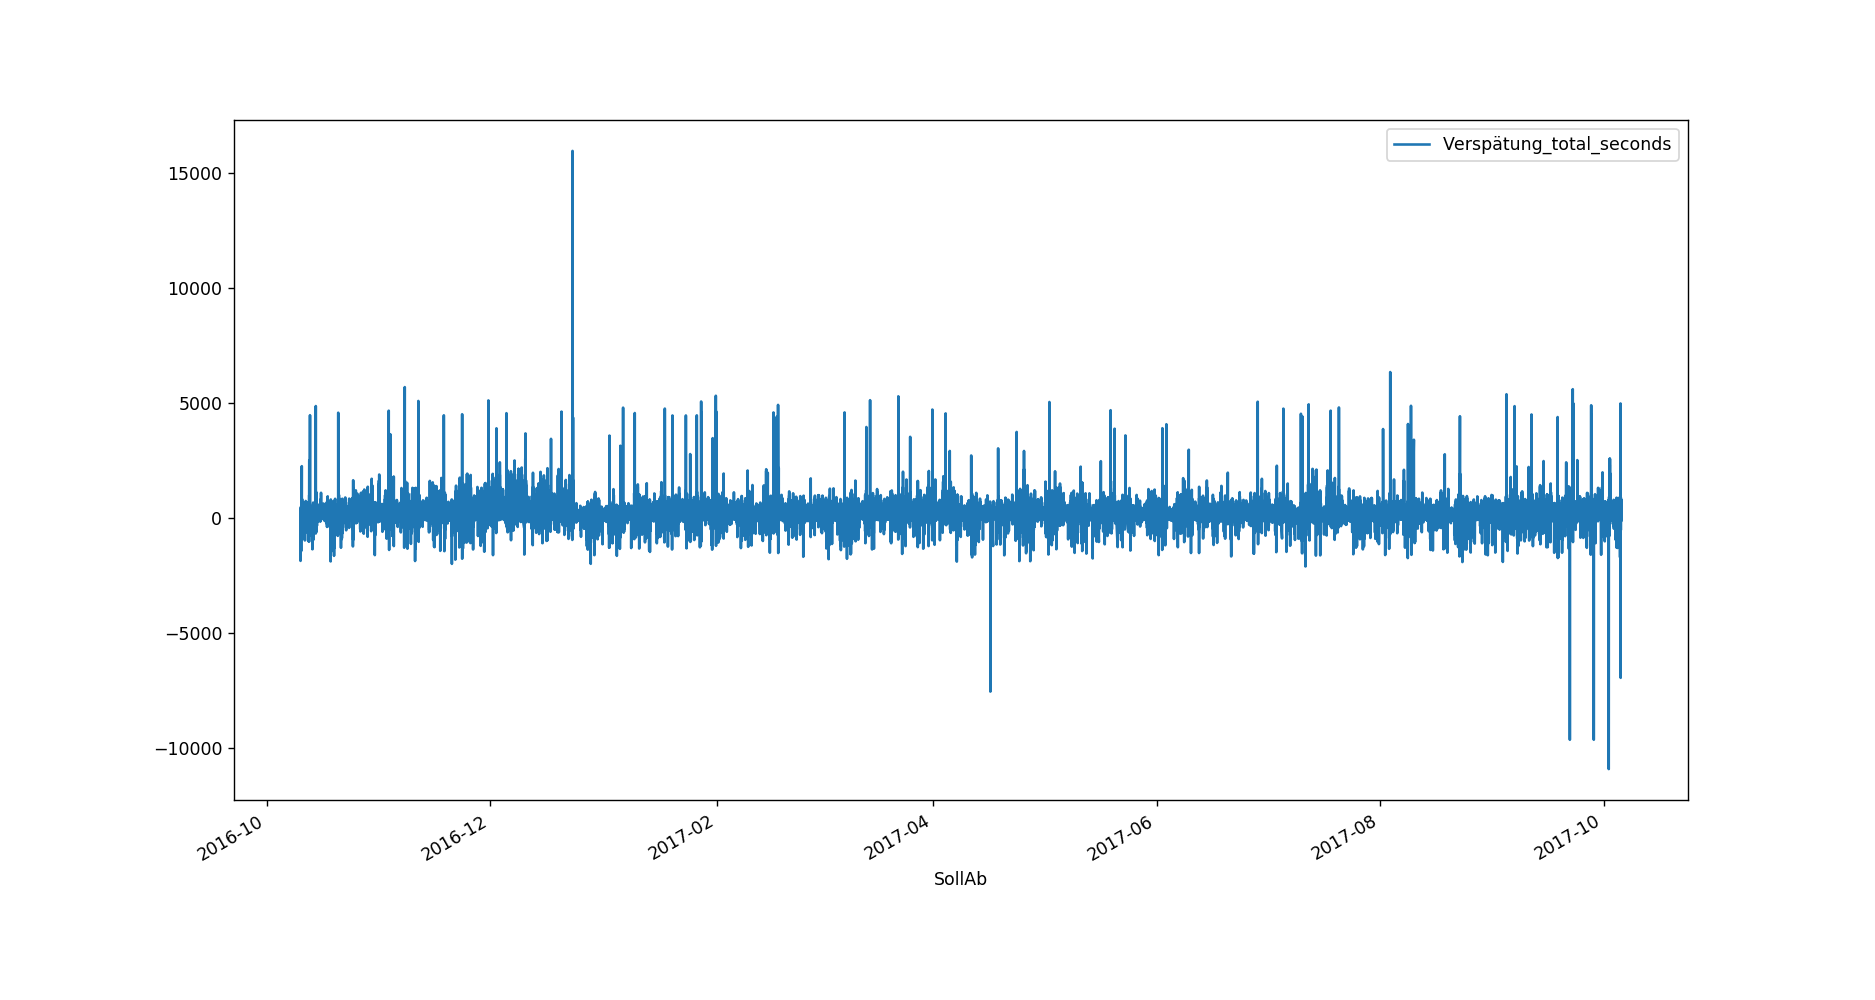

In [60]:
df.plot(x='SollAb', y='Verspätung_total_seconds', figsize=(15, 8))

## Preprocessing

In [11]:
df_pre = df.copy()

In [12]:
from sklearn import preprocessing
# Scaling numerical features to range [0, 1]
min_max_scaler = preprocessing.MinMaxScaler()
df_pre[['Temperatur (°C)', 'Windstärke (km/h)']] = min_max_scaler.fit_transform(df[['Temperatur (°C)', 'Windstärke (km/h)']])
# Check that it works.
df_pre.plot(x='SollAb', y='Temperatur (°C)', figsize=(20, 10))

<IPython.core.display.Javascript object>

In [32]:
#29451 of 816403 bus departures had a delay of more than 10 minutes.  3.6%
test = df_pre[df_pre["Verspätung_total_seconds"]>600]
test

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,...,Linienverlauf_49 Amelsb¿rener Str.,Linienverlauf_50 Sternkamp,Linienverlauf_51 Hansestr. A,Linienverlauf_52 Raringheide,Linienverlauf_53 Pater-Kolbe-Str.,Linienverlauf_54 Plutoweg,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch
1144,2016-10-10,Montag,7,1194098,1545,04 Stellmacherweg,2016-10-10 12:33:00,2016-10-10 12:47:42,519486219.0,75275802.0,...,0,0,0,0,0,0,0,0,0,0
1151,2016-10-10,Montag,7,1194098,1545,05 Roxel Bahnhof,2016-10-10 12:34:00,2016-10-10 12:48:39,519462505.0,75262616.0,...,0,0,0,0,0,0,0,0,0,0
1155,2016-10-10,Montag,7,1194098,1545,06 Stellmacherweg,2016-10-10 12:35:00,2016-10-10 12:49:45,519485516.0,75277136.0,...,0,0,0,0,0,0,0,0,0,0
1377,2016-10-10,Montag,5,1094584,5410,05 Roxel Bahnhof,2016-10-10 13:54:00,2016-10-10 14:04:31,519462505.0,75262616.0,...,0,0,0,0,0,0,0,0,0,0
1382,2016-10-10,Montag,5,1094584,5410,06 Stellmacherweg,2016-10-10 13:55:00,2016-10-10 14:05:29,519485516.0,75277136.0,...,0,0,0,0,0,0,0,0,0,0
1427,2016-10-10,Montag,4,1055106,6329,01 Roxel Hallenbad A,2016-10-10 14:11:00,2016-10-10 14:48:28,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0
1448,2016-10-10,Montag,4,1194746,1545,45 Hiltrup Schulzentr./Stadthalle,2016-10-10 14:18:00,2016-10-10 14:28:20,519031052.0,76396161.0,...,0,0,0,0,0,0,0,0,0,0
1453,2016-10-10,Montag,4,1194746,1545,49 Amelsb¿rener Str.,2016-10-10 14:21:00,2016-10-10 14:31:34,518981752.0,76237688.0,...,1,0,0,0,0,0,0,0,0,0
1455,2016-10-10,Montag,4,1194746,1545,50 Sternkamp,2016-10-10 14:22:00,2016-10-10 14:32:52,51896075.0,76224819.0,...,0,1,0,0,0,0,0,0,0,0
1457,2016-10-10,Montag,4,1194746,1545,51 Hansestr. A,2016-10-10 14:23:00,2016-10-10 14:33:47,518932283.0,76219297.0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
#19606 of 816403 bus departures were more than 1min to early.  2.4%
test = df_pre[df_pre["Verspätung_total_seconds"]<-60]
test


,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,...,Linienverlauf_49 Amelsb¿rener Str.,Linienverlauf_50 Sternkamp,Linienverlauf_51 Hansestr. A,Linienverlauf_52 Raringheide,Linienverlauf_53 Pater-Kolbe-Str.,Linienverlauf_54 Plutoweg,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch
44,2016-10-10,Montag,2,1081890,5556,52 Raringheide,2016-10-10 05:40:00,2016-10-10 05:38:53,518873694.0,76205111.0,...,0,0,0,1,0,0,0,0,0,0
51,2016-10-10,Montag,2,1081890,5556,55 Amelsb¿ren Schule,2016-10-10 05:43:00,2016-10-10 05:41:54,51885448.0,76077011.0,...,0,0,0,0,0,0,1,0,0,0
71,2016-10-10,Montag,10,1032142,6318,01 Roxel Hallenbad A,2016-10-10 05:57:00,2016-10-10 05:25:51,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0
75,2016-10-10,Montag,10,1032142,6318,02 Pantaleonstra¿e,2016-10-10 05:58:00,2016-10-10 05:33:44,519539.0,75313352.0,...,0,0,0,0,0,0,0,0,0,0
79,2016-10-10,Montag,10,1032142,6318,03 Pienersallee,2016-10-10 06:00:00,2016-10-10 05:34:44,519511969.0,75300852.0,...,0,0,0,0,0,0,0,0,0,0
162,2016-10-10,Montag,12,1162346,1350,05 Roxel Bahnhof,2016-10-10 06:39:00,2016-10-10 06:37:37,519462505.0,75262616.0,...,0,0,0,0,0,0,0,0,0,0
164,2016-10-10,Montag,12,1022034,2847,52 Raringheide,2016-10-10 06:40:00,2016-10-10 06:38:51,518873694.0,76205111.0,...,0,0,0,1,0,0,0,0,0,0
194,2016-10-10,Montag,10,1042502,5384,01 Roxel Hallenbad A,2016-10-10 06:57:00,2016-10-10 06:52:11,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0
567,2016-10-10,Montag,4,1033306,6350,01 Roxel Hallenbad A,2016-10-10 09:11:00,2016-10-10 09:09:52,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0
741,2016-10-10,Montag,4,1043666,5384,01 Roxel Hallenbad A,2016-10-10 10:11:00,2016-10-10 09:46:55,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Discard outliers.

df_pre = df_pre[df_pre["Verspätung_total_seconds"] > -1200]  #discard early departures of more than 20 minutes
df_pre = df_pre[df_pre["Verspätung_total_seconds"] < 3600]   #discard delays longer than an hour
df_pre

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,...,Linienverlauf_49 Amelsb¿rener Str.,Linienverlauf_50 Sternkamp,Linienverlauf_51 Hansestr. A,Linienverlauf_52 Raringheide,Linienverlauf_53 Pater-Kolbe-Str.,Linienverlauf_54 Plutoweg,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch
0,2016-10-10,Montag,4,1061896,1299,01 Roxel Hallenbad A,2016-10-10 05:16:00,2016-10-10 05:15:45,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-10,Montag,2,1081890,5556,30 Ludgeriplatz B,2016-10-10 05:17:00,2016-10-10 05:17:58,519558997.0,76278508.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-10,Montag,2,1081890,5556,31 Goebenstr.,2016-10-10 05:19:00,2016-10-10 05:19:03,51952888.0,76254844.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-10,Montag,4,1061896,1299,03 Pienersallee,2016-10-10 05:19:00,2016-10-10 05:19:09,519511969.0,75300852.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-10,Montag,2,1081890,5556,32 St. Joseph-Kirche,2016-10-10 05:20:00,2016-10-10 05:20:00,519493516.0,76243561.0,...,0,0,0,0,0,0,0,0,0,0
5,2016-10-10,Montag,4,1061896,1299,04 Stellmacherweg,2016-10-10 05:20:00,2016-10-10 05:20:16,519486219.0,75275802.0,...,0,0,0,0,0,0,0,0,0,0
6,2016-10-10,Montag,2,1081890,5556,33 Alter Sch¿tzenhof A,2016-10-10 05:21:00,2016-10-10 05:20:44,519460313.0,76232794.0,...,0,0,0,0,0,0,0,0,0,0
7,2016-10-10,Montag,4,1061896,1299,05 Roxel Bahnhof,2016-10-10 05:21:00,2016-10-10 05:21:13,519462505.0,75262616.0,...,0,0,0,0,0,0,0,0,0,0
8,2016-10-10,Montag,4,1061896,1299,06 Stellmacherweg,2016-10-10 05:22:00,2016-10-10 05:22:34,519485516.0,75277136.0,...,0,0,0,0,0,0,0,0,0,0
9,2016-10-10,Montag,2,1081890,5556,34 Metzer Str.,2016-10-10 05:23:00,2016-10-10 05:23:20,519422225.0,76234541.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Endcode categorial variables as one-hot vectors.
df_pre = pd.concat([df_pre, pd.get_dummies(df_pre[['Wochentag', 'Wetter', 'Linienverlauf']])], axis=1)
df_pre

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,...,Linienverlauf_49 Amelsb¿rener Str.,Linienverlauf_50 Sternkamp,Linienverlauf_51 Hansestr. A,Linienverlauf_52 Raringheide,Linienverlauf_53 Pater-Kolbe-Str.,Linienverlauf_54 Plutoweg,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch
0,2016-10-10,Montag,4,1061896,1299,01 Roxel Hallenbad A,2016-10-10 05:16:00,2016-10-10 05:15:45,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-10,Montag,2,1081890,5556,30 Ludgeriplatz B,2016-10-10 05:17:00,2016-10-10 05:17:58,519558997.0,76278508.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-10,Montag,2,1081890,5556,31 Goebenstr.,2016-10-10 05:19:00,2016-10-10 05:19:03,51952888.0,76254844.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-10,Montag,4,1061896,1299,03 Pienersallee,2016-10-10 05:19:00,2016-10-10 05:19:09,519511969.0,75300852.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-10,Montag,2,1081890,5556,32 St. Joseph-Kirche,2016-10-10 05:20:00,2016-10-10 05:20:00,519493516.0,76243561.0,...,0,0,0,0,0,0,0,0,0,0
5,2016-10-10,Montag,4,1061896,1299,04 Stellmacherweg,2016-10-10 05:20:00,2016-10-10 05:20:16,519486219.0,75275802.0,...,0,0,0,0,0,0,0,0,0,0
6,2016-10-10,Montag,2,1081890,5556,33 Alter Sch¿tzenhof A,2016-10-10 05:21:00,2016-10-10 05:20:44,519460313.0,76232794.0,...,0,0,0,0,0,0,0,0,0,0
7,2016-10-10,Montag,4,1061896,1299,05 Roxel Bahnhof,2016-10-10 05:21:00,2016-10-10 05:21:13,519462505.0,75262616.0,...,0,0,0,0,0,0,0,0,0,0
8,2016-10-10,Montag,4,1061896,1299,06 Stellmacherweg,2016-10-10 05:22:00,2016-10-10 05:22:34,519485516.0,75277136.0,...,0,0,0,0,0,0,0,0,0,0
9,2016-10-10,Montag,2,1081890,5556,34 Metzer Str.,2016-10-10 05:23:00,2016-10-10 05:23:20,519422225.0,76234541.0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
len(df['Linienverlauf'].unique())

58

In [54]:
# Split into training and test set (1:10).
df_test = df_pre.iloc[::10]
df_train = df_pre.iloc[~df_pre.index.isin(df_test.index)]
df_train.shape, df_test.shape

((734428, 162), (81604, 162))

In [57]:
# Separate data into features and target.
feature_cols = [col_name for col_name in df_pre 
                if col_name.startswith('Wetter_') 
                or col_name.startswith('Wochentag_')
                or col_name.startswith('Linienverlauf_')]
feature_cols.extend(['Temperatur (°C)', 'Windstärke (km/h)'])
features = df_train[feature_cols]
target = df_train['Verspätung_total_seconds']

In [64]:
df_train[feature_cols]

,Wochentag_Dienstag,Wochentag_Dienstag,Wochentag_Donnerstag,Wochentag_Donnerstag,Wochentag_Freitag,Wochentag_Freitag,Wochentag_Mittwoch,Wochentag_Mittwoch,Wochentag_Montag,Wochentag_Montag,...,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch,Linienverlauf_58 Am Dornbusch,Temperatur (°C),Windstärke (km/h)
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
5,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
6,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
8,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
9,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14
11,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.333333,0.14


In [19]:
# idx = 100
# print(
#     """
#     target = {0:.2f}
#     prediction = {1:.2f}""".format(
#         df_test['Verspätung_total_seconds'].iloc[idx], 
#         lin_reg.predict([(df_test[feature_cols]).iloc[idx]])[0]
#     )
# )

In [20]:
def try_model(model):
    model.fit(features, target)
    predictions = model.predict(df_test[feature_cols])
    loss = np.mean(np.abs((df_test['Verspätung_total_seconds'] - predictions)))
    print('loss = ', loss)
    return model

try_model(DummyRegressor())


loss =  141.383847406


DummyRegressor(constant=None, quantile=None, strategy='mean')

In [21]:
m0 = try_model(linear_model.LinearRegression())

loss =  128.451676017


In [22]:
m1 = try_model(linear_model.ElasticNetCV())

loss =  128.477833231


In [23]:
m2 = try_model(linear_model.ElasticNet())

loss =  140.843277646


In [24]:
m3 = try_model(ensemble.RandomForestRegressor())

loss =  126.512865217


In [25]:
m4 = try_model(ensemble.RandomForestRegressor(n_estimators=20))

KeyboardInterrupt: 

In [ ]:
# Plot the results of the model.



In [ ]:
pd.datetime.  ('NaT')